<a href="https://colab.research.google.com/github/syedmdhussain/HATE-SPEECH-DETECTION-USING-NLP/blob/main/hate_speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries and Data



In [ ]:
import sys
print(sys.version)


3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 29.9 MB/s 


In [ ]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.stem.porter import *
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#nltk.download('corpus')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
import torch

import keras
from keras import layers
from keras import layers
import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow_hub as hub
#import tensorflow_text as text
#from official.nlp import optimization
#import tensorflow_addons as tfa
from sklearn.metrics import f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv
df = pd.read_csv("https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
np.savetxt(r'c:\data\np.txt', df['tweet'].values, fmt='%d')

# EDA

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df.drop(['Unnamed: 0'], axis = 1)

We will mostly be working with the class and tweet column

In [ ]:
df.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [ ]:
df['class'].mask(df['class'] == 0, 1, inplace=True)

In [ ]:
df['class'] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
24778    False
24779    False
24780    False
24781    False
24782    False
Name: class, Length: 24783, dtype: bool

In [ ]:
df.nunique()

Unnamed: 0            24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     2
tweet                 24783
dtype: int64

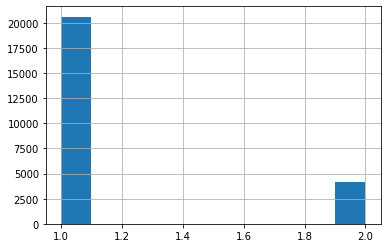

In [ ]:
df['class'].hist()

we see that the dataset is not balanced

In [ ]:
df['class'].value_counts()

1    20620
2     4163
Name: class, dtype: int64

# Vader

In [ ]:

def sentiment_scores(sentence,list):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(sentence)
  if sentiment_dict['compound'] >= 0.05 :
    list.append("positive")
  elif sentiment_dict['compound'] <= - 0.05 :
    list.append("negative")
  else :
    list.append("neutral")
  


In [ ]:
df.shape

(24783, 7)

In [ ]:
sentiment=[]
count=0

for i in df['tweet']:
  sentiment_scores(i,sentiment)

In [ ]:
#tokenized
df1 = pd.DataFrame({'sentiment':sentiment})

In [ ]:
df['sentiment']=df1['sentiment']

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,sentiment
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,positive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,negative
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,negative
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,positive
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,positive
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,neutral
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",negative
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,positive
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,negative


# Sarcasm

In [ ]:
!pip install paralleldots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import paralleldots

In [ ]:
paralleldots.set_api_key("Hsza2nt5TLOMrhnDm1cLFqDLpoP2ZvqwaFhQz6Lnsr0")
tweet_list=list(df['tweet'])
import time
resp=[]


In [ ]:
i=0
for tweet in tweet_list[21000:22000]:
  if i%19==0:
    print("I am sleeping")
    time.sleep(60)
    
  response = paralleldots.sarcasm(tweet)
  resp.append([tweet,response['Sarcastic']])
  i+=1

I am sleeping


In [ ]:
resp

In [ ]:
df1= pd.DataFrame({'sarcasm':resp})
df1.to_csv("sarcasm.csv")

In [ ]:
df['tweet'][6998]

# Word2Vec

In [ ]:
corpus_text = 'n'.join(df['tweet'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [ ]:
model1 = gensim.models.Word2Vec(data, min_count = 1,size = 100, window = 5, sg=0)
model1 

In [ ]:
print(model1)

Word2Vec(vocab=46090, size=100, alpha=0.025)


# Exhuastive Pre Processing

In [ ]:
##preprocess
import re
import sys
import nltk
#sys.path.append("../py")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def remove_users(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x))) # remove re-tweet
    df[col] = df[col].apply(lambda x: re.sub(r'(@[A-Za-z0-9-_]+)', '', str(x))) # remove tweeted at
    

def remove_special_char(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'&[\S]+?;', '', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'[^\w\s]', r'', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'#', ' ', str(x)))
    

def remove_links(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'http\S+', '', str(x)))  # remove http links
    df[col] = df[col].apply(lambda x: re.sub(r'bit.ly/\S+', '', str(x)))  # remove bit.ly links   
    

def remove_numerics(df, col):
    """function to remove numbers or words with digits"""
    df[col] = df[col].apply(lambda x: re.sub(r'\w*\d\w*', r'', str(x)))
    

def remove_whitespaces(df, col):
    """function to remove any double or more whitespaces to single and any leading and trailing whitespaces"""
    df[col] = df[col].apply(lambda x: re.sub(r'\s\s+', ' ', str(x))) 
    df[col] = df[col].apply(lambda x: re.sub(r'(\A\s+|\s+\Z)', '', str(x)))
     

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    for token in word_tokens:    
        if token.lower not in stop_words and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def tokenize_and_lemmatize(df, col):
    df[col] = df[col].apply(lambda x: tokenize(x))
    #df.tweet = df.tweet.apply(lambda x: str(x)[1:-1])


def preprocess_tweets(df, col):
    """master function to preprocess tweets"""
    remove_users(df, col)
    remove_links(df, col)
    remove_special_char(df, col)
    remove_whitespaces(df, col)
    remove_numerics(df, col)
    tokenize_and_lemmatize(df, col) 
    return df


def preprocess(tweet):
    result = re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    result = re.sub(r'(@[A-Za-z0-9-_]+)', '', result)
    result = re.sub(r'http\S+', '', result)
    result = re.sub(r'bit.ly/\S+', '', result)
    # result = re.sub(r'(.)\1+', r'\1\1', result)
    result = " ".join(re.findall('[A-Z][^A-Z]*', result)) 
    result = re.sub(r'&[\S]+?;', '', result)
    result = re.sub(r'#', ' ', result)
    result = re.sub(r'[^\w\s]', r'', result)    
    result = re.sub(r'\w*\d\w*', r'', result)
    result = re.sub(r'\s\s+', ' ', result)
    result = re.sub(r'(\A\s+|\s+\Z)', '', result)
    result = tokenize(result)
    return list(result)

In [ ]:
preprocess_tweets(df, 'tweet') 
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,sentiment
0,0,3,0,0,3,2,"[woman, you, shouldnt, complain, about, clean,...",positive
1,1,3,0,3,0,1,"[boy, dats, coldtyga, dwn, bad, for, cuffin, d...",negative
2,2,3,0,3,0,1,"[Dawg, You, ever, fuck, bitch, and, she, start...",negative
3,3,3,0,2,1,1,"[she, look, like, tranny]",positive
4,4,6,0,6,0,1,"[The, shit, you, hear, about, might, true, mig...",positive


In [ ]:
#df['tweet']
tokenized=[]
for index, row in df.iterrows():
  for i in row['tweet']:
    tokenized.append(i)

In [ ]:
tokenized

['woman',
 'you',
 'shouldnt',
 'complain',
 'about',
 'clean',
 'your',
 'house',
 'man',
 'you',
 'should',
 'always',
 'take',
 'the',
 'trash',
 'out',
 'boy',
 'dats',
 'coldtyga',
 'dwn',
 'bad',
 'for',
 'cuffin',
 'dat',
 'hoe',
 'the',
 'place',
 'Dawg',
 'You',
 'ever',
 'fuck',
 'bitch',
 'and',
 'she',
 'start',
 'cry',
 'You',
 'confuse',
 'shit',
 'she',
 'look',
 'like',
 'tranny',
 'The',
 'shit',
 'you',
 'hear',
 'about',
 'might',
 'true',
 'might',
 'faker',
 'than',
 'the',
 'bitch',
 'who',
 'tell',
 'The',
 'shit',
 'just',
 'blow',
 'meclaim',
 'you',
 'faithful',
 'and',
 'down',
 'for',
 'somebody',
 'but',
 'still',
 'fuck',
 'with',
 'hoe',
 'can',
 'not',
 'just',
 'sit',
 'and',
 'HATE',
 'another',
 'bitch',
 'get',
 'too',
 'much',
 'shit',
 'go',
 'cause',
 'tire',
 'you',
 'big',
 'bitch',
 'come',
 'for',
 'skinny',
 'girls',
 'you',
 'might',
 'not',
 'get',
 'bitch',
 'back',
 'thats',
 'that',
 'hobbies',
 'include',
 'fight',
 'Mariam',
 'bitch',


# pos tagging

In [ ]:
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

'''
txt = "Sukanya, Rajib and Naba are my good friends. " \
	"Sukanya is getting married next year. " \
	"Marriage is a big step in one’s life." \
	"It is both exciting and frightening. " \
	"But friendship is a sacred bond between people." \
	"It is a special kind of love between us. " \
	"Many of you must have tried searching for a friend "\
	"but never found the right one."'''

# sent_tokenize is one of instances of
# PunktSentenceTokenizer from the nltk.tokenize.punkt module

#tokenized = sent_tokenize(df['tweet'])
tagged=[]
for i in tokenized:
	
	# Word tokenizers is used to find the words
	# and punctuation in a string
	wordsList = nltk.word_tokenize(i)

	# removing stop words from wordList
	wordsList = [w for w in wordsList ]

	# Using a Tagger. Which is part-of-speech
	# tagger or POS-tagger.
	tagged.append(nltk.pos_tag(wordsList))

	#df.loc[i,'pos_tags']=tagged


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#tagged
df1 = pd.DataFrame({'pos_tagged':tagged})



In [ ]:
df['pos']=df1['pos_tagged']

In [ ]:
z=['women', 'you','shouldnt']

In [ ]:
k= nltk.pos_tag(z)

In [ ]:
k

[('women', 'NNS'), ('you', 'PRP'), ('shouldnt', 'VBP')]

In [ ]:
df=df.reset_index()

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [ ]:
df.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,sentiment,pos
0,0,3,0,0,3,2,"[woman, you, shouldnt, complain, about, clean,...",positive,"[(woman, NN)]"
1,1,3,0,3,0,1,"[boy, dats, coldtyga, dwn, bad, for, cuffin, d...",negative,"[(you, PRP)]"
2,2,3,0,3,0,1,"[Dawg, You, ever, fuck, bitch, and, she, start...",negative,"[(shouldnt, NN)]"
3,3,3,0,2,1,1,"[she, look, like, tranny]",positive,"[(complain, NN)]"
4,4,6,0,6,0,1,"[The, shit, you, hear, about, might, true, mig...",positive,"[(about, IN)]"


In [ ]:
l=[]
for index, row in df.iterrows():
    #print(index)
    #df.loc[index,'pos_tags'] = nltk.pos_tag(row['tweet'])
    l.append(nltk.pos_tag(row['tweet']))
    #list= nltk.pos_tag(row['tweet'])

In [ ]:
df1 = pd.DataFrame({'pos_tagged':l})

In [ ]:
df['pos_tags']=df1['pos_tagged']

In [ ]:
df=df.drop(['pos'],axis=1)

In [ ]:
df

,index,count,hate_speech,offensive_language,neither,class,tweet,sentiment,pos_tags
0,0,3,0,0,3,2,"[woman, you, shouldnt, complain, about, clean,...",positive,"[(woman, NN), (you, PRP), (shouldnt, VBP), (co..."
1,1,3,0,3,0,1,"[boy, dats, coldtyga, dwn, bad, for, cuffin, d...",negative,"[(boy, NN), (dats, NNS), (coldtyga, VBP), (dwn..."
2,2,3,0,3,0,1,"[Dawg, You, ever, fuck, bitch, and, she, start...",negative,"[(Dawg, NNP), (You, PRP), (ever, RB), (fuck, V..."
3,3,3,0,2,1,1,"[she, look, like, tranny]",positive,"[(she, PRP), (look, VBP), (like, IN), (tranny,..."
4,4,6,0,6,0,1,"[The, shit, you, hear, about, might, true, mig...",positive,"[(The, DT), (shit, NN), (you, PRP), (hear, VBP..."
...,...,...,...,...,...,...,...,...,...
24778,24778,3,0,2,1,1,"[yous, muthafin, lie, right, His, trash, Now, ...",neutral,"[(yous, JJ), (muthafin, NN), (lie, NN), (right..."
24779,24779,3,0,1,2,2,"[youve, go, and, break, the, wrong, heart, bab...",negative,"[(youve, NN), (go, VB), (and, CC), (break, VB)..."
24780,24780,3,0,3,0,1,"[young, buck, wan, eat, dat, nigguh, like, ain...",positive,"[(young, JJ), (buck, NN), (wan, JJ), (eat, NN)..."
24781,24781,6,0,6,0,1,"[youu, get, wild, bitch, tellin, you, lie]",negative,"[(youu, NN), (get, VB), (wild, JJ), (bitch, NN..."


#Pattern feature

In [ ]:
for i in range(0,1):
  for j in range(0,len(df['tweet'][i])):
    print(df['pos_tags'][i][j][-1]) 
    #print(df['tweet'][i][j])

In [ ]:
senti = []
for i in range(0,1):
  for j in range(0,len(df['tweet'][i])):
    if df['pos_tags'][i][j][-1] in ['NN','JJ','VB','VBD']:
      sentiment_scores(df['tweet'][i][j],senti)
print(senti)
print()
df['tweet'][0]


In [ ]:
def pattern_feature_tagging(row1,row2):
  for j in row1:
    if row2=='positive':
      
      if j[-1] in ['NN', 'VB', 'JJ', 'VBD', 'NNS']:
        l1.append((j[0],'pos'+j[-1]))
      else:
        continue
    elif row2=='negative':
        l1.append((j[0],'neg'+j[-1]))
    elif row2=='neutral':
        l1.append((j[0],'neu'+j[-1]))
  

In [ ]:
l1=[]
for index,row in df.iterrows():
  l1.append(pattern_feature_tagging(row['pos_tags'],row['sentiment']))

In [ ]:
l1